### Env Setting

In [30]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils

### Loading Taxi dataset

In [2]:
yellow = pd.read_csv("full_yellow.csv", index_col=0)
green = pd.read_csv("full_green.csv", index_col=0)
fhv = pd.read_csv("full_fhv.csv", index_col=0)
hvfhv = pd.read_csv("full_hvfhv.csv", index_col=0)
trad_taxi = yellow.append(green)
app_taxi = fhv.append(hvfhv)

In [3]:
yellow.index = pd.to_datetime(yellow.index)
green.index = pd.to_datetime(green.index)
fhv.index = pd.to_datetime(fhv.index)
hvfhv.index = pd.to_datetime(hvfhv.index)
trad_taxi.index = pd.to_datetime(trad_taxi.index)
app_taxi.index = pd.to_datetime(app_taxi.index)

In [4]:
yellow_monthly = yellow.groupby(pd.Grouper(freq="M")).sum()
green_monthly = green.groupby(pd.Grouper(freq="M")).sum()
fhv_monthly = fhv.groupby(pd.Grouper(freq="M")).sum()
hvfhv_monthly = hvfhv.groupby(pd.Grouper(freq="M")).sum()
trad_taxi_monthly = trad_taxi.groupby(pd.Grouper(freq="M")).sum()
app_taxi_monthly = app_taxi.groupby(pd.Grouper(freq="M")).sum()

### Plotting - Raw Data (Monthly)

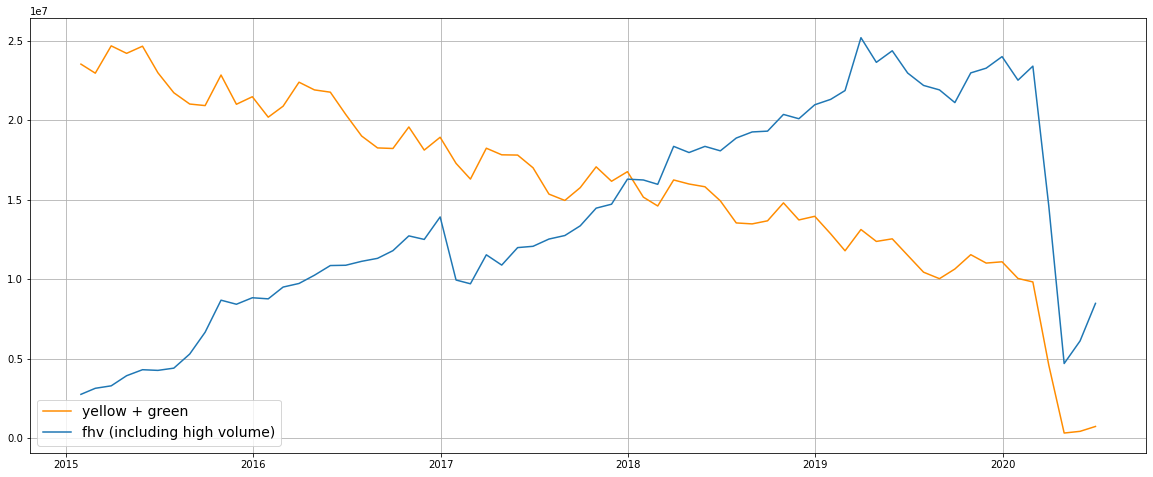

In [5]:
individual = False

plt.figure(figsize=(20,8))
if individual: 
    plt.plot(yellow_monthly['passenger_count'], label="yellow")
    plt.plot(green_monthly['passenger_count'], label="green")
    plt.plot(fhv_monthly['passenger_count'], label="fhv")
    plt.plot(hvfhv_monthly['passenger_count'], label="hvfhv")
else:
    plt.plot(trad_taxi_monthly['passenger_count'], label="yellow + green", c="darkorange")
    plt.plot(app_taxi_monthly['passenger_count'], label="fhv (including high volume)")

plt.legend(fontsize=14)
plt.grid()
plt.show()

### Plotting ACF, PACF

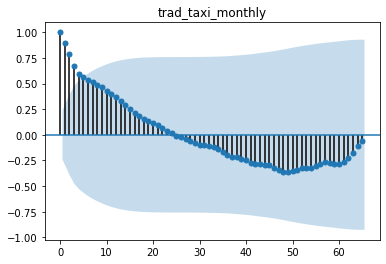

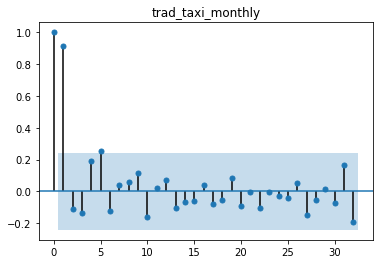

In [34]:
w_t = trad_taxi_monthly['passenger_count']
lag = len(w_t) -1
title = 'trad_taxi_monthly'
plot_acf(x=w_t, lags=lag, title=title)
plt.show()
plot_pacf(x=w_t, lags=lag//2, title=title)
plt.show()

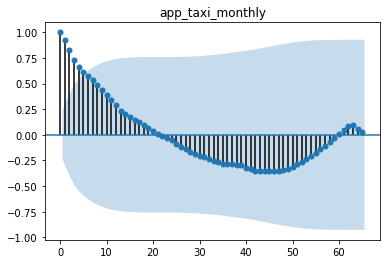

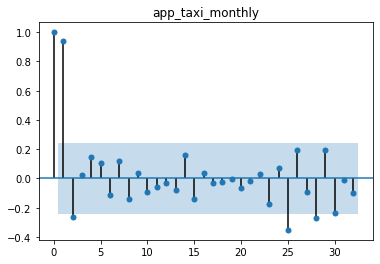

In [35]:
w_t = app_taxi_monthly['passenger_count']
lag = len(w_t) -1
title = 'app_taxi_monthly'
plot_acf(x=w_t, lags=lag, title=title)
plt.show()
plot_pacf(x=w_t, lags=lag//2, title=title)
plt.show()